In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from xgboost import XGBClassifier
import pickle
import dash
from dash import dcc, html, Input, Output
import dash_bootstrap_components as dbc

In [2]:
diaPred = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
diaPred.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


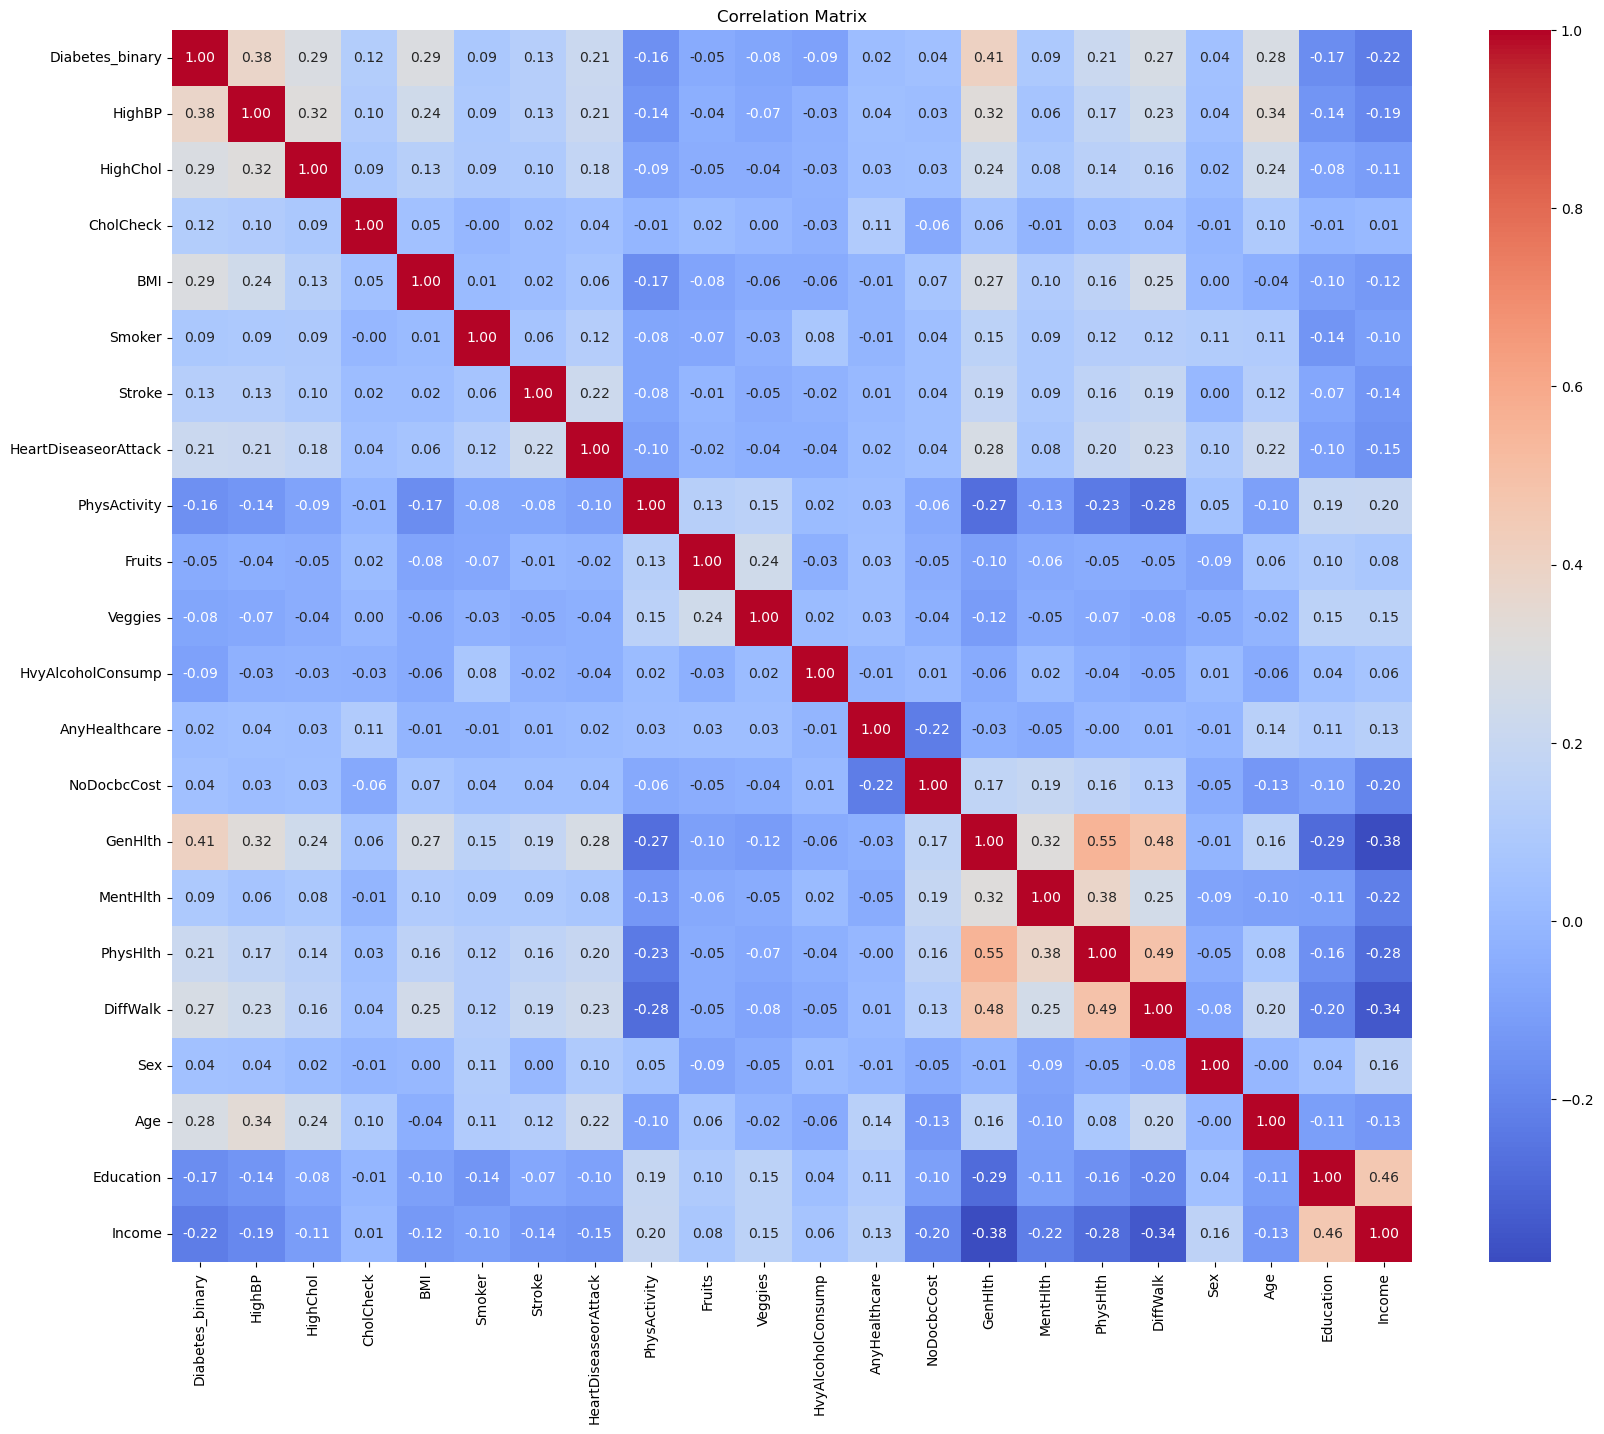

In [3]:
# Plot the correlation matrix of the main numerical features
plt.subplots(figsize=(20, 16))

sns.heatmap(diaPred.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix");

In [4]:
# Drop the unnecessary columns
diaPred.drop(columns = ["CholCheck", "Stroke", "Smoker", "Fruits", "Veggies", 
                        "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost", "MentHlth"], inplace = True)

# Feature Engineering on Age column
diaPred["Age"] = diaPred["Age"] + 48

diaPred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   BMI                   70692 non-null  float64
 4   HeartDiseaseorAttack  70692 non-null  float64
 5   PhysActivity          70692 non-null  float64
 6   GenHlth               70692 non-null  float64
 7   PhysHlth              70692 non-null  float64
 8   DiffWalk              70692 non-null  float64
 9   Sex                   70692 non-null  float64
 10  Age                   70692 non-null  float64
 11  Education             70692 non-null  float64
 12  Income                70692 non-null  float64
dtypes: float64(13)
memory usage: 7.0 MB


In [5]:
# Convert the values data type to int
diaPred = diaPred.astype(int)
diaPred.head()

,Diabetes_binary,HighBP,HighChol,BMI,HeartDiseaseorAttack,PhysActivity,GenHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,26,0,1,3,30,0,1,4,6,8
1,0,1,1,26,0,0,3,0,0,1,12,6,8
2,0,0,0,26,0,1,1,10,0,1,13,6,8
3,0,1,1,28,0,1,3,3,0,1,11,6,8
4,0,0,0,29,0,1,2,0,0,0,8,5,8


In [7]:
# Dataset splitting
X = diaPred.drop(columns = "Diabetes_binary")
y = diaPred["Diabetes_binary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Training and evaluating a Baseline Model to set a benchmark for our models
acc_baseline = (y_train.value_counts(normalize = True).max())*100
print("Baseline Accuracy:", round(acc_baseline, 2), "%") #50

Baseline Accuracy: 50.04 %


In [8]:
# Instantiate the Random Forest Regressor model
XGBModel = XGBClassifier(gamma=0.51, n_estimators=25, subsample = 0.96, max_depth=5, max_leaves = 0, random_state = 42, verbosity = 3)


#Fit the model
XGBModel.fit(X_train, y_train)

[17:49:06] ======== Monitor (0): HostSketchContainer ========
[17:49:06] AllReduce: 0.00149s, 1 calls @ 1490us

[17:49:06] MakeCuts: 0.001574s, 1 calls @ 1574us

[17:49:06] DEBUG: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\gbm\gbtree.cc:130: Using tree method: 0
[17:49:06] ======== Monitor (0): Learner ========
[17:49:06] Configure: 0.001224s, 1 calls @ 1224us

[17:49:06] EvalOneIter: 0.000513s, 25 calls @ 513us

[17:49:06] GetGradient: 0.029413s, 25 calls @ 29413us

[17:49:06] PredictRaw: 0.000139s, 25 calls @ 139us

[17:49:06] UpdateOneIter: 0.271171s, 25 calls @ 271171us

[17:49:06] ======== Monitor (0): GBTree ========
[17:49:06] BoostNewTrees: 0.233949s, 25 calls @ 233949us

[17:49:06] CommitModel: 7.9e-05s, 25 calls @ 79us

[17:49:06] ======== Monitor (0): HistUpdater ========
[17:49:06] BuildHistogram: 0.049634s, 100 calls @ 49634us

[17:49:06] EvaluateSplits: 0.007946s, 125 calls @ 7946us

[17:49:06] In

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.51, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=0,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=25, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [9]:
 # Make Predictions
XGB_y_pred = XGBModel.predict(X_test)

# Evaluate the Model
XGBModelScore = round((accuracy_score(y_test, XGB_y_pred))*100, 2)
print("XGB Classifier Accuracy:", round(XGBModelScore, 2), "%") #74.55

[17:49:06] DEBUG: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\gbm\gbtree.cc:130: Using tree method: 0
XGB Classifier Accuracy: 75.0 %


In [10]:
# Save the model for future use
with open("BRFSS2015 Diabetes Model.pkl", "wb") as file:
    pickle.dump(XGBModel, file)

In [11]:
# Model classification report
print("XGB Classifier Classification Report:\n", classification_report(y_test, XGB_y_pred))

XGB Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.70      0.74      7090
           1       0.73      0.80      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



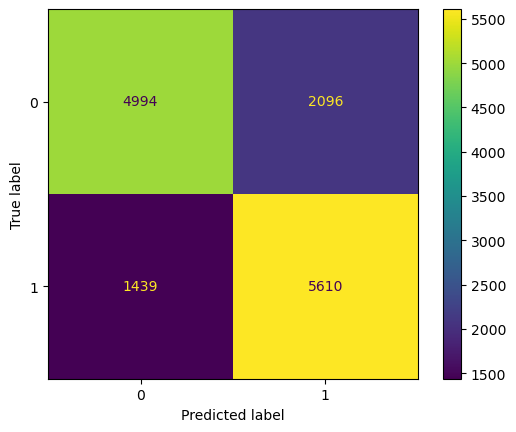

In [12]:
# Plot the model confusion Matrix
ConfusionMatrixDisplay.from_estimator(XGBModel, X_test, y_test);

In [13]:
# Load the pre-trained model
try:
    with open("BRFSS2015 Diabetes Model.pkl", "rb") as file:
        model = pickle.load(file)
except Exception as e:
    print(f"Error loading model: {e}")
    raise


# Initialize Dash app
app = dash.Dash(__name__)

# Dropdown options for categorical features
yes_no_options = ["Yes", "No"]
sex_options = ["Male", "Female"]
edu_options = ["Less than High School", "High School/GED", "Some College", 
               "College Graduate", "Professional Degree", "Doctorate Degree"]
income_options = ["Very Low Income", "Low Income", "Lower Middle Income", "Middle Income", 
                  "Upper Middle Income", "High Income", "Very High Income", "Top Income"]

In [14]:
# Layout
app.layout = dbc.Container([
    html.H1("BRFSS2015 Diabetes Prediction Dashboard", style={'textAlign': 'center'}),
        dbc.Row([
            dbc.Col([
                html.Label("Age"),
                dcc.Input(id='age', type='number', placeholder="Enter Age", min=18, max=120),
            ]),
            dbc.Col([
                html.Label("Sex"),
                dcc.Dropdown(id='sex', options=[{'label': s, 'value': s} for s in sex_options], placeholder="Select Gender"),
            ]),
            dbc.Col([
                html.Label("HighBP"),
                dcc.Dropdown(id='highBP', options=[{'label': opt, 'value': opt} for opt in yes_no_options], placeholder="Select High BP"),
            ]),
        ]),
            
        dbc.Row(
            [
                dbc.Col([
                    html.Label("HighChol"),
                    dcc.Dropdown(id='highChol', options=[{'label': opt, 'value': opt} for opt in yes_no_options], placeholder="Select High Cholesterol"),
                ]),
                dbc.Col([
                    html.Label("BMI"),
                    dcc.Input(id='bmi', type='number', placeholder="Enter BMI", min=10, max=50),
                ]),
            ],
        ),
              
        dbc.Row(
            [
                dbc.Col([
                    html.Label("Heart Disease or Attack"),
                    dcc.Dropdown(id='heartDiseaseorAttack', options=[{'label': opt, 'value': opt} for opt in yes_no_options], 
                                 placeholder="Select Heart Disease or Attack"),
                ]),
                    
                dbc.Col([
                    html.Label("Physical Activity"),
                    dcc.Dropdown(id='physActivity', options=[{'label': opt, 'value': opt} for opt in yes_no_options], placeholder="Select Physical Activity"),
                ]),
                    
                dbc.Col([
                    html.Label("General Health (1-5)"),
                    dcc.Input(id="genHlth", type="number", placeholder="Enter General Health Rating", min=1, max=5),
                ]),
            ]
        ),
              
        dbc.Row(
            [
                dbc.Col([
                    html.Label("Physical Health (0 - 30 days)"),
                    dcc.Input(id="physHlth", type="number", placeholder="Enter Physical Health Days", min=0, max=30),
                ]),
                dbc.Col([
                    html.Label("Difficulty Walking"),
                    dcc.Dropdown(id='diffWalk', options=[{'label': opt, 'value': opt} for opt in yes_no_options], placeholder="Select Difficulty in Walking"),
                ]),
                dbc.Col([
                    html.Label("Education"),
                    dcc.Dropdown(id='education', options=[{'label': edu, 'value': edu} for edu in edu_options], placeholder="Select Education"),
                ]),
                dbc.Col([
                    html.Label("Income"),
                    dcc.Dropdown(id='income', options=[{'label': inc, 'value': inc} for inc in income_options], placeholder="Select Income Level"),
                ]),
            ]
        ),
   # ]
    #        ),
    
    dbc.Button("Predict", id='predict-button', n_clicks=0, color="primary", style={"marginTop": "20px"}),
    html.Div(id='output-prediction', style={'textAlign': 'center', 'marginTop': '20px'}),
    
    ],
    fluid=True,
)

In [15]:
# callback (backend network)
@app.callback(
    Output('output-prediction', 'children'),
    [Input('age', 'value'),
     Input('sex', 'value'),
     Input('highBP', 'value'),
     Input('highChol', 'value'),
     Input('bmi', 'value'),
     Input('heartDiseaseorAttack', 'value'),
     Input('physActivity', 'value'),
     Input('genHlth', 'value'),
     Input('physHlth', 'value'),
     Input('diffWalk', 'value'),
     Input('education', 'value'),
     Input('income', 'value'),
     Input('predict-button', 'n_clicks')]
)
def predict_diabetes(age, sex, highBP, highChol, bmi, heartDiseaseorAttack, 
                     physActivity, genHlth, physHlth, diffWalk, education, 
                     income, n_clicks):
    if n_clicks > 0:
        if any(val is None for val in [age, sex, highBP, highChol, bmi, heartDiseaseorAttack, 
                                       physActivity, genHlth, physHlth, diffWalk, education, income]):
            return "Please fill in all the fields."

        
        # Prepare input data
        input_data = pd.DataFrame([{
            "HighBP": highBP,
            "HighChol": highChol,
            "BMI": bmi,
            "HeartDiseaseorAttack": heartDiseaseorAttack,
            "PhysActivity": physActivity,
            "GenHlth": genHlth,
            "PhysHlth": physHlth,
            "DiffWalk": diffWalk,
            "Sex": sex,
            "Age": age,
            "Education": education,
            "Income": income
        }])

        binary_fields = ["HighBP", "HighChol", "HeartDiseaseorAttack", 
                         "PhysActivity", "DiffWalk"]
        # Map binary variables
        binary_mapping = {"Yes": 1, "No": 0}
        for field in binary_fields:
            input_data[field] = input_data[field].map(binary_mapping)

        # Encode categorical variables
        le_sex = LabelEncoder().fit(sex_options)
        le_edu = LabelEncoder().fit(edu_options)
        le_inc = LabelEncoder().fit(income_options)

        input_data["Sex"] = le_sex.transform([input_data["Sex"][0]])[0]
        input_data["Education"] = le_edu.transform([input_data["Education"][0]])[0]
        input_data["Income"] = le_inc.transform([input_data["Income"][0]])[0]

        # Predict using the model
        prediction = model.predict(input_data)[0]
        return f"Prediction: {'Diabetic' if prediction == 1 else 'Non-Diabetic'}"
    return ""

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)